In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\conno_leva1li\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill )

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [9]:
df_exploded = df_DA_US.explode('job_skills')

df_DA_skills = df_exploded.groupby('job_skills').agg(
    skill_count= ('job_skills', 'count'),
    median_salary= ('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10)

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [11]:
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count *100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


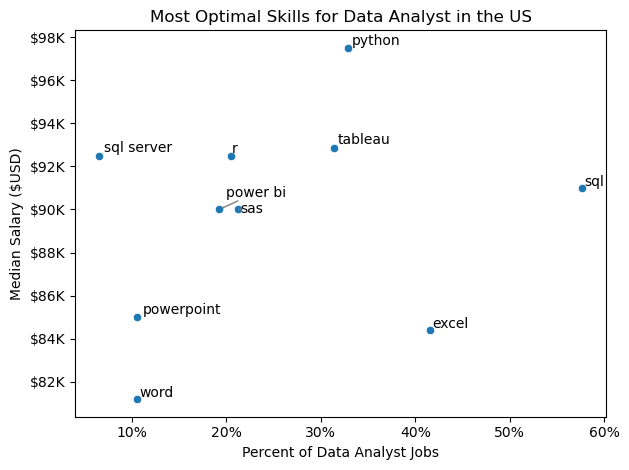

In [31]:
from adjustText import adjust_text

sns.scatterplot(data=df_DA_skills, x='skill_percent', y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analyst in the US')

texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color = 'gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.tight_layout()


In [34]:
df_tech = df['job_type_skills'].copy()
df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()
tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else: 
            tech_dict[key] = value



for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))
tech_dict


{'analyst_tools': ['outlook',
  'spss',
  'powerbi',
  'ms access',
  'ssrs',
  'cognos',
  'nuix',
  'alteryx',
  'qlik',
  'visio',
  'excel',
  'dax',
  'sharepoint',
  'msaccess',
  'power bi',
  'powerpoint',
  'looker',
  'datarobot',
  'spreadsheet',
  'esquisse',
  'sas',
  'sap',
  'splunk',
  'tableau',
  'microstrategy',
  'sheets',
  'ssis',
  'word'],
 'programming': ['clojure',
  'kotlin',
  'sql',
  'groovy',
  'sass',
  'mongo',
  'solidity',
  'cobol',
  'css',
  'haskell',
  'ruby',
  'perl',
  'r',
  'c#',
  'go',
  'no-sql',
  'javascript',
  'mongodb',
  'scala',
  'f#',
  'lisp',
  'powershell',
  'erlang',
  'visualbasic',
  'vba',
  'ocaml',
  'c++',
  'apl',
  'elixir',
  't-sql',
  'crystal',
  'bash',
  'php',
  'sas',
  'c',
  'assembly',
  'dart',
  'nosql',
  'html',
  'visual basic',
  'objective-c',
  'matlab',
  'java',
  'python',
  'shell',
  'rust',
  'swift',
  'pascal',
  'fortran',
  'vb.net',
  'lua',
  'delphi',
  'typescript',
  'julia',
  'gol

In [38]:
df_technology = pd.DataFrame(tech_dict.items(), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,spss
0,analyst_tools,powerbi
0,analyst_tools,ms access
0,analyst_tools,ssrs
...,...,...
9,sync,twilio
9,sync,mattermost
9,sync,microsoft teams
9,sync,unify


In [46]:
df_plot = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


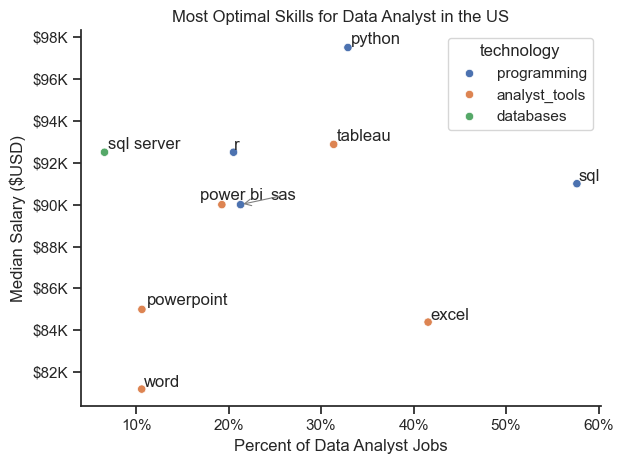

In [58]:
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analyst in the US')

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], txt))
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.8),
    force_text=0.7,
    force_points=0.5,
    expand_text=(1.1, 1.2)
)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.tight_layout()
